# Heart Disease Prediction 

### Import Important Liberary and Dataset

In [3]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

In [4]:
heart_data = pd.read_csv('heart.csv')
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
heart_data.shape

(303, 14)

### Data Preprocessing

In [7]:
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Data Visualization

c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


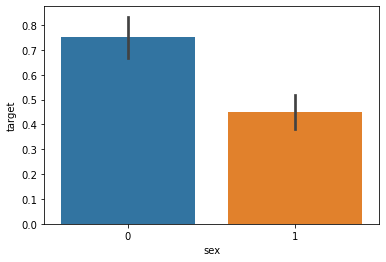

In [10]:
sn.barplot(heart_data['sex'], heart_data['target'])

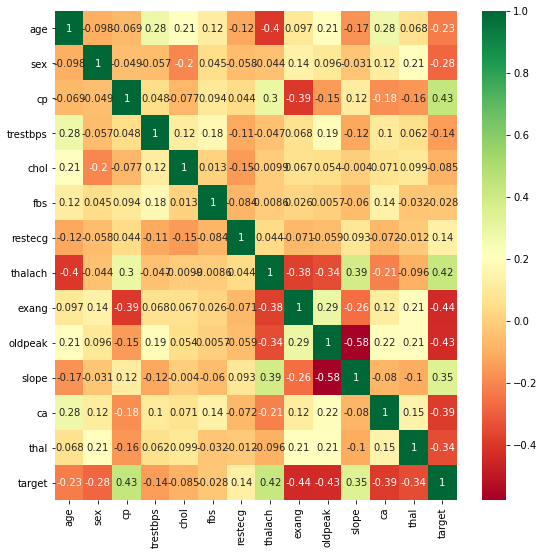

In [11]:
plt.figure(figsize=(9,9))
sn.heatmap(heart_data.corr(), annot=True,cmap='RdYlGn')

### Data Processing

In [13]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [14]:
bin = [0, 7, 13, 18, 38, 100]
label = ['Baby', 'Child', 'Teeneager', 'Adult', 'Old']
age_data = pd.cut(heart_data['age'], bins=bin, labels=label)

In [15]:
age_data.value_counts()

Old          291
Adult         12
Teeneager      0
Child          0
Baby           0
Name: age, dtype: int64

In [17]:
heart_data['age'] = age_data
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,Old,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,Adult,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,Old,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,Old,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,Old,0,0,120,354,0,1,163,1,0.6,2,0,2,1


c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


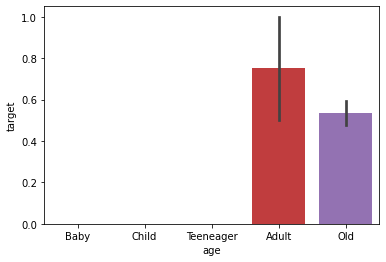

In [18]:
sn.barplot(heart_data['age'], heart_data['target'])

In [19]:
mapper = {'Adult':1,"Old":0}
heart_data.replace(mapper, inplace=True)

### Converting Data into Standard Form

In [21]:
from sklearn.preprocessing import StandardScaler
sc_scale = StandardScaler()
scale_values = ['trestbps','chol','thalach','oldpeak']
heart_data[scale_values] = sc_scale.fit_transform(heart_data[scale_values])

#### Spliting Data into training and test data

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(heart_data.drop('target', axis=1), heart_data['target'], test_size= 0.3,random_state = 1)

## Using RandomForest for Creating Model 

In [25]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=10, n_jobs=-1, random_state=1)

In [26]:
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, n_jobs=-1, random_state=1)

In [28]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, rf_classifier.predict(X_test))
print("Accuracy of Random Forest Classifier :-> ", accuracy,"%")

Accuracy of Random Forest Classifier :->  0.8131868131868132 %
